Exercises

## Part I

Do these exercises in explore.ipynb notebook. As always, add, commit, and push your changes.

## Section 1 - iris_db: Using iris data from our MySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

###  2. Univariate Stats

     -  For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive       
       statistics (using .describe()).

     -  For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

     -  Document takeaways & any actions.


### 3. Bivariate Stats

    - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a  
      
      horizontal line showing the overall mean of the metric (y-axis).

    - For each measurement type, compute the descriptive statistics for each species.

    - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test 
    
      (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 
    
      Do the same for the other measurement types.

    - Document takeaways & any actions.

### 4. Multivariate Stats

    - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or 
    
      something similar) and add color to represent species.

    - Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

    - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable 
    
      name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from 
    
      this visualization.

    - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared 
    
      to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test,be 
    
      sure assumptions are met (independence, normality, equal variance).
 
    - Document takeaways and any actions.

> 1. Acquire, prepare & split your data.

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import our acquire module
import acquire
import prepare

from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df=acquire.get_iris_data()

this file exists, reading csv


In [3]:
df.head(3)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


In [4]:
df=prepare.prep_iris(df)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
train_iris,validate_iris,test_iris=prepare.splitting_data(df,'species')

In [6]:
print(f'shape of iris DB: {df.shape}')
print('-----------------------------')
print(f'shape of train_iris: {train_iris.shape}')
print(f'shape of validate_iris: {validate_iris.shape}')
print(f'shape of test_iris: {test_iris.shape}')

shape of iris DB: (150, 5)
-----------------------------
shape of train_iris: (90, 5)
shape of validate_iris: (30, 5)
shape of test_iris: (30, 5)


In [7]:
train_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor


In [8]:
train_iris.shape

(90, 5)

In [9]:
validate_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica
100,6.3,3.3,6.0,2.5,virginica
43,5.0,3.5,1.6,0.6,setosa
91,6.1,3.0,4.6,1.4,versicolor


In [10]:
validate_iris.shape

(30, 5)

In [11]:
test_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
86,6.7,3.1,4.7,1.5,versicolor


In [12]:
test_iris.shape

(30, 5)

In [13]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


> 2. Univariate Stats

 -2.1 For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [14]:
train_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor


In [15]:
# List of quantitative variables (columns to analyze)
quantitative_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


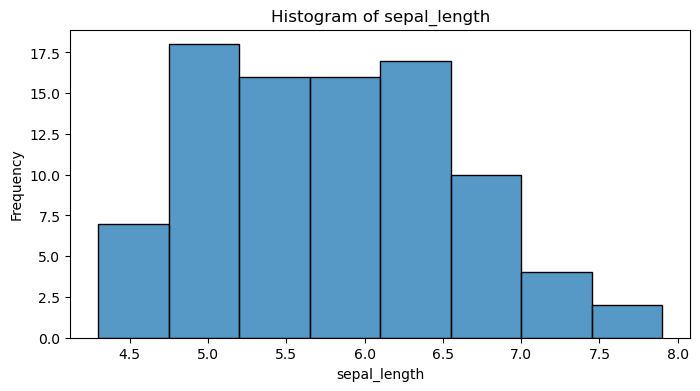

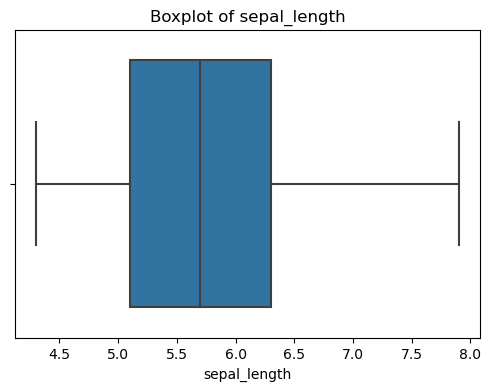

Descriptive Statistics for sepal_length:
count    90.000000
mean      5.781111
std       0.792081
min       4.300000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64
/n
/n
/n


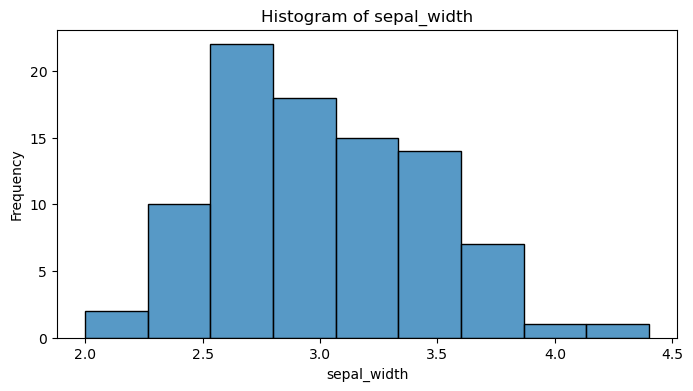

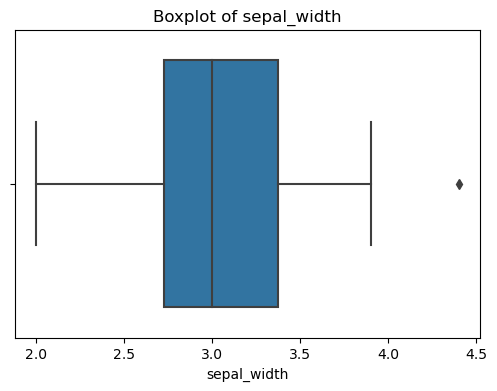

Descriptive Statistics for sepal_width:
count    90.000000
mean      3.023333
std       0.434741
min       2.000000
25%       2.725000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64
/n
/n
/n


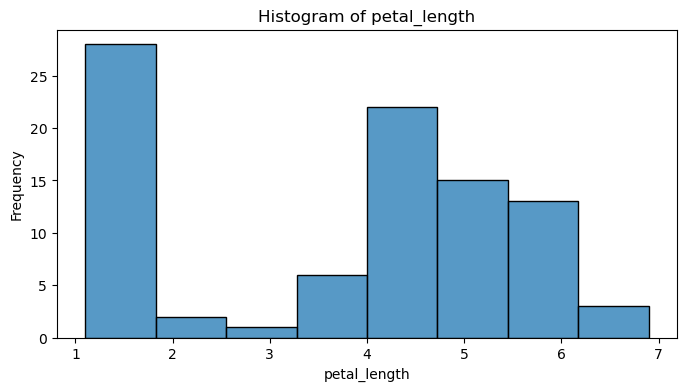

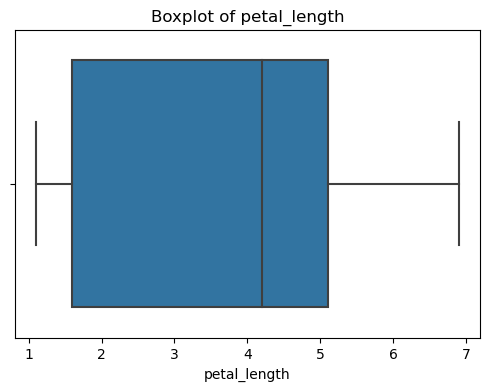

Descriptive Statistics for petal_length:
count    90.000000
mean      3.728889
std       1.710526
min       1.100000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
/n
/n
/n


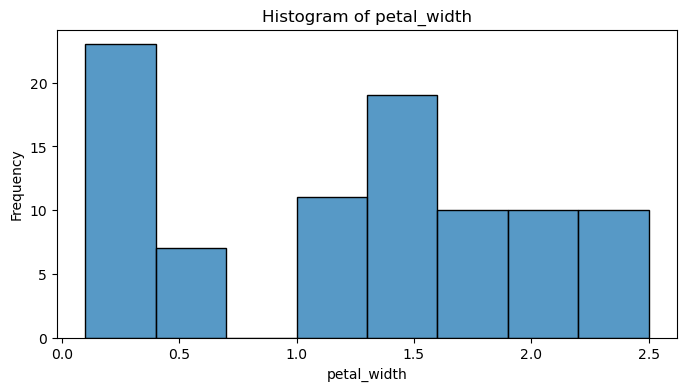

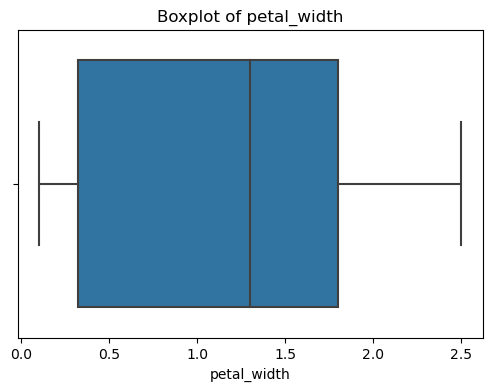

Descriptive Statistics for petal_width:
count    90.000000
mean      1.191111
std       0.757679
min       0.100000
25%       0.325000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
/n
/n
/n


In [16]:
# Loop through each quantitative variable
for var in quantitative_vars:
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_iris,x=var)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train_iris,x=var)
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()
    
    # descriptive statistics for quantitative variable:

    print(f"Descriptive Statistics for {var}:")
    print(train_iris[var].describe())
    print('/n')
    print('/n')
    print('/n')



In [17]:
# descriptive statistics for quantitative variable:
for var in quantitative_vars:
    print(f"Descriptive Statistics for {var}:")
    print(train_iris[var].describe())
    print('\n')
    print('\n')
    print('\n')


Descriptive Statistics for sepal_length:
count    90.000000
mean      5.781111
std       0.792081
min       4.300000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64






Descriptive Statistics for sepal_width:
count    90.000000
mean      3.023333
std       0.434741
min       2.000000
25%       2.725000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64






Descriptive Statistics for petal_length:
count    90.000000
mean      3.728889
std       1.710526
min       1.100000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64






Descriptive Statistics for petal_width:
count    90.000000
mean      1.191111
std       0.757679
min       0.100000
25%       0.325000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64








> 2.2 -  For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [18]:
train_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor


In [19]:
# Create frequency table for each species
species_freq = train_iris['species'].value_counts()

species_freq

species
setosa        30
virginica     30
versicolor    30
Name: count, dtype: int64

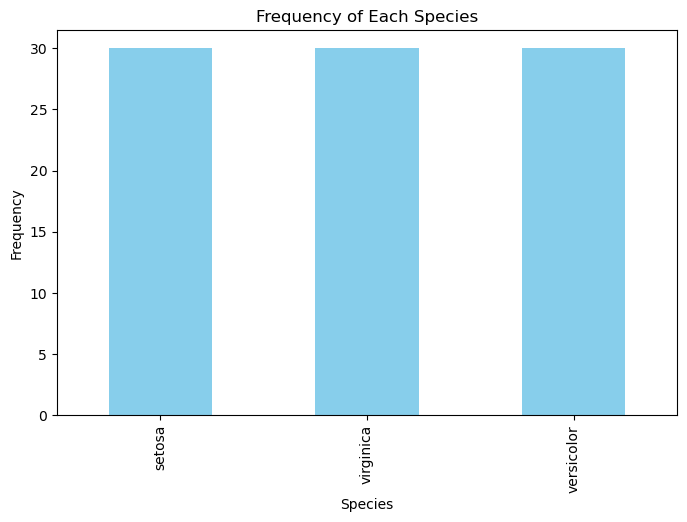

In [20]:
# Create bar plot for frequencies
plt.figure(figsize=(8, 5))
species_freq.plot(kind='bar',color='skyblue')
plt.title('Frequency of Each Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show();


Text(0, 0.5, 'Frequency')

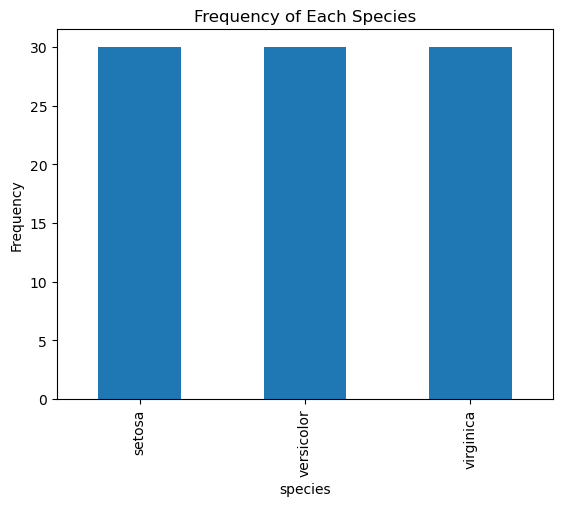

In [21]:
# another way:

train_iris['species'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Each Species')
plt.ylabel('Frequency')

> 2.3 Document takeaways & any actions.

### Explore conclusions for univariate stats,

- In the boxplot of sepal_width has  outlier but rest of the measurements have not figured out outliers.

- From frequency V/S species, each species have same freq (uniform distribution).


### 3. Bivariate Stats     
### follow the process:-

                                1.Hypothesize
                                2.Visualize
                                3.Analyze (with stats)
                                4.Summarize


> 3.1  Visualize each measurement type (y-axis) with the species   variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).


In [22]:
train_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor


In [23]:
train_iris.shape

(90, 5)

Hypothesis Setting:
Q: Does the 'species' type have any relationship with measurement type?

/var/folders/l4/1glwr7x126vcbshwm4chw95m0000gn/T/ipykernel_1002/3708300825.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='sepal_length', data=train_iris, ci=None)
/var/folders/l4/1glwr7x126vcbshwm4chw95m0000gn/T/ipykernel_1002/3708300825.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='sepal_width', data=train_iris, ci=None)
/var/folders/l4/1glwr7x126vcbshwm4chw95m0000gn/T/ipykernel_1002/3708300825.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal_length', data=train_iris, ci=None)
/var/folders/l4/1glwr7x126vcbshwm4chw95m0000gn/T/ipykernel_1002/3708300825.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal_width', data=train_iris, ci=None)


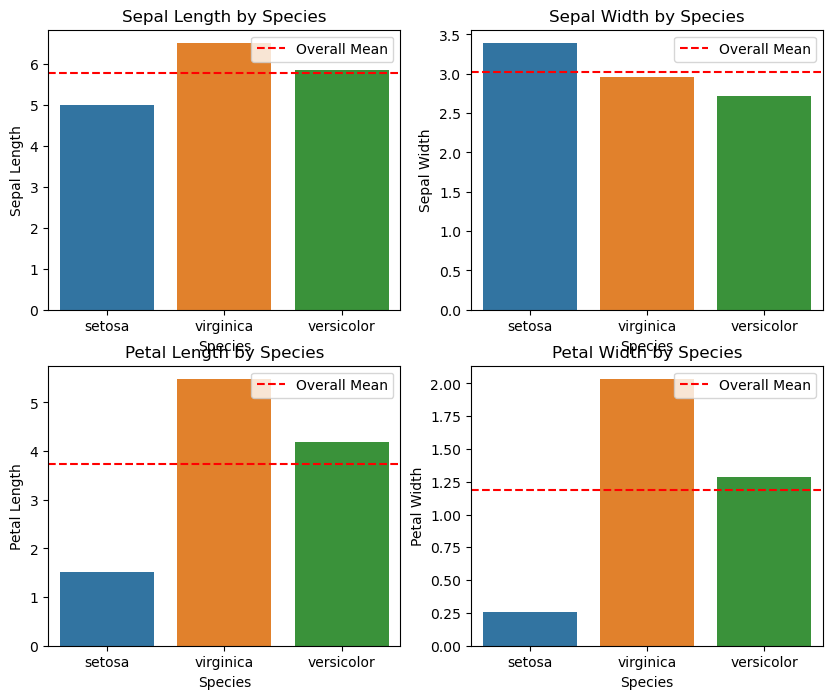

In [24]:
# Calculate the mean of each measurement type for all species
means = train_iris.groupby('species').mean()

# Set up the plot for sepal length
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='species', y='sepal_length', data=train_iris, ci=None)
overall_mean_sepal_length = train_iris['sepal_length'].mean()
plt.axhline(y=overall_mean_sepal_length, color='red', linestyle='--', label='Overall Mean')
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.legend()

# Set up the plot for sepal width
plt.subplot(2, 2, 2)
sns.barplot(x='species', y='sepal_width', data=train_iris, ci=None)
overall_mean_sepal_width = train_iris['sepal_width'].mean()
plt.axhline(y=overall_mean_sepal_width, color='red', linestyle='--', label='Overall Mean')
plt.title('Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.legend()

# Set up the plot for petal length
plt.subplot(2, 2, 3)
sns.barplot(x='species', y='petal_length', data=train_iris, ci=None)
overall_mean_petal_length = train_iris['petal_length'].mean()
plt.axhline(y=overall_mean_petal_length, color='red', linestyle='--', label='Overall Mean')
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.legend()

# Set up the plot for petal width
plt.subplot(2, 2, 4)
sns.barplot(x='species', y='petal_width', data=train_iris, ci=None)
overall_mean_petal_width = train_iris['petal_width'].mean()
plt.axhline(y=overall_mean_petal_width, color='red', linestyle='--', label='Overall Mean')
plt.title('Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.legend()


plt.show()


> 3.2 For each measurement type, compute the descriptive statistics for each species.

In [25]:
# Grouping the data by 'species'
grouped_data = train_iris.groupby('species')

# List of measurement types
measurements = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# Calculate descriptive statistics for each measurement type within each species
for measurement in measurements:
    print(f"Descriptive statistics for '{measurement}' by species:")
    stats_by_species = grouped_data[measurement].describe()
    print(stats_by_species)
    print("\n")


Descriptive statistics for 'sepal_length' by species:
            count      mean       std  min    25%  50%    75%  max
species                                                           
setosa       30.0  4.993333  0.354219  4.3  4.800  5.0  5.175  5.7
versicolor   30.0  5.843333  0.478996  5.0  5.525  5.7  6.075  7.0
virginica    30.0  6.506667  0.616404  4.9  6.225  6.4  6.875  7.9


Descriptive statistics for 'sepal_width' by species:
            count  mean       std  min    25%   50%   75%  max
species                                                       
setosa       30.0  3.39  0.384484  2.3  3.200  3.40  3.65  4.4
versicolor   30.0  2.72  0.303315  2.0  2.525  2.75  2.90  3.4
virginica    30.0  2.96  0.319050  2.5  2.800  2.95  3.10  3.8


Descriptive statistics for 'petal_length' by species:
            count      mean       std  min  25%  50%    75%  max
species                                                         
setosa       30.0  1.510000  0.178789  1.1  1.4  1.5  1

> 3.3 For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 
Do the same for the other measurement types.



In [26]:
train_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor


Hypothesis Setting:

$H_o$ : There is no significant difference of mean petal_width between 'virginica' and 'versicolor'.

$H_a$ : There is significant difference of mean petal_width between 'virginica' and 'versicolor'.

alpha=0.05

In [27]:
# Separate data for 'virginica' and 'setosa'
virginica_petal_width = train_iris[train_iris['species'] == 'virginica']['petal_width']
versicolor_petal_width = train_iris[train_iris['species'] == 'versicolor']['petal_width']


In [28]:
#for normality check:
    
stat,p=stats.shapiro(train_iris.petal_width)
stat,p

(0.9049954414367676, 6.818122983531794e-06)

Since p< alpha, so we reject Ho. That means, petal_width data does not follow the distribution.
Therefore, we can use Mann-whitney test ( 2 sample - 2 tail).

In [29]:


# Filter data for 'virginica' and 'versicolor' species
virginica_data = train_iris[train_iris['species'] == 'virginica']
versicolor_data = train_iris[train_iris['species'] == 'versicolor']

# List of measurement types
measurements = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for measurement in measurements:
    # Extract data for the current measurement type
    measurement_virginica = virginica_data[measurement]
    measurement_versicolor = versicolor_data[measurement]
    
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(measurement_virginica, measurement_versicolor)
    
    # Display the results
    print(f"Mann-Whitney U test for '{measurement}':")
    print(f"Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpret the p-value to determine significance
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a significant difference between virginica and versicolor.")
    else:
        print("There is no significant difference between virginica and versicolor.")
    
    print("\n")


Mann-Whitney U test for 'sepal_length':
Statistic: 738.0
P-value: 2.0617069812153646e-05
There is a significant difference between virginica and versicolor.


Mann-Whitney U test for 'sepal_width':
Statistic: 627.5
P-value: 0.00844990346320156
There is a significant difference between virginica and versicolor.


Mann-Whitney U test for 'petal_length':
Statistic: 884.0
P-value: 1.368106833576727e-10
There is a significant difference between virginica and versicolor.


Mann-Whitney U test for 'petal_width':
Statistic: 889.0
P-value: 7.12423012584302e-11
There is a significant difference between virginica and versicolor.




> 3.4 Document takeaways & any actions.

### Explore conclusions from bivariate(stats)

From train_iris dataframe,

- iris has three species, these are 'setosa', 'versicolor', & 'virginica'.

- Each of them are compared on the based of four measurements 'sepal_length','sepal_width', 'pedal_length', 
    & 'pedal_width'.
    
- From statistics, i have been found that each species are significatly difference in terms of their measurements.



> 4 Multivariate Stats 

            -USE TRAIN DATASET ONLY-
        
            - can ask more targeted questions, like subgroup vs subgroup vs category

            - multivariate statistical tests exist, but are outside the scope of this course.

                                        1.Hypothesize
                                        2.Visualize
                                        3.~Analyze (with statistics)~
                                        4.Summarize

> 4.1 
Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [30]:
train_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

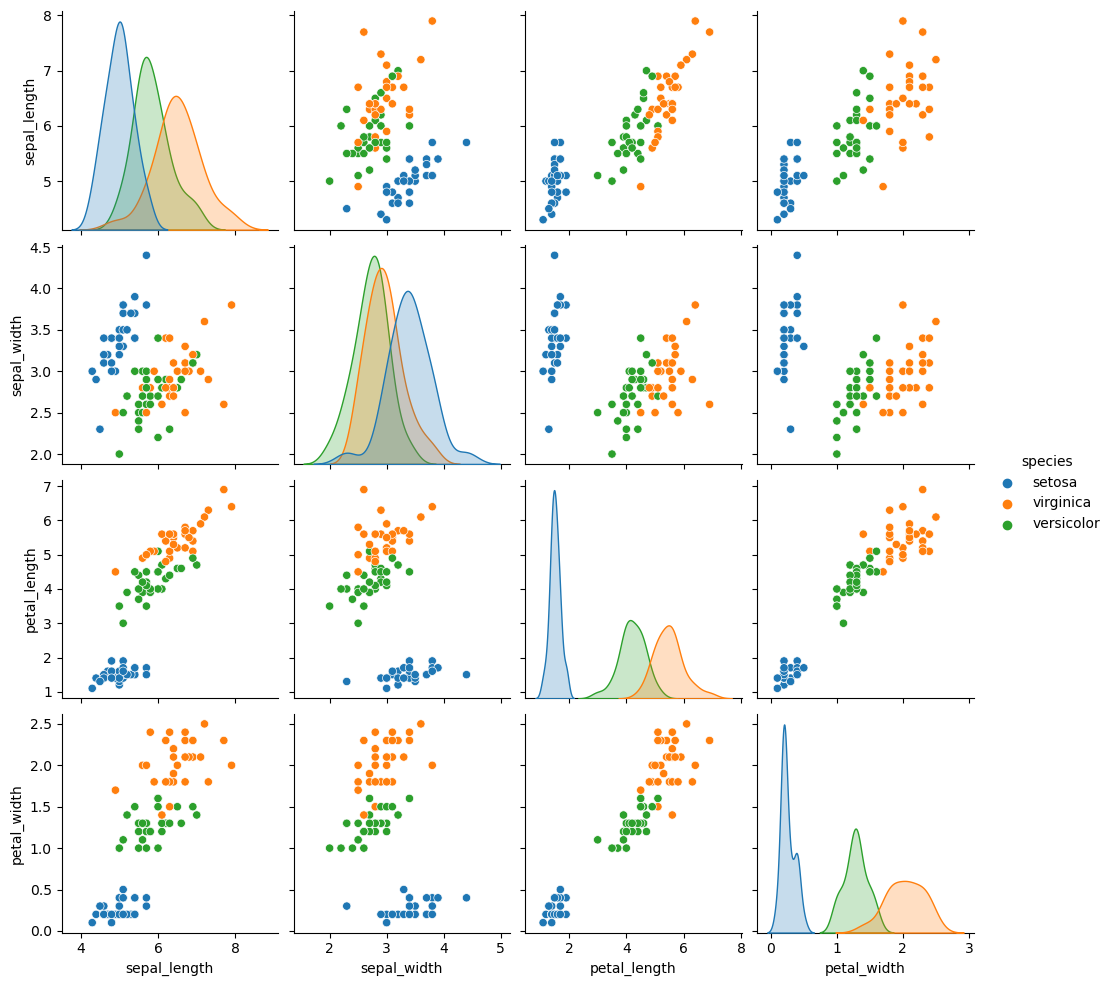

In [31]:
plt.figure(figsize=(6,6))
sns.pairplot(data=train_iris, hue='species')
plt.show();


> 4.2 Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


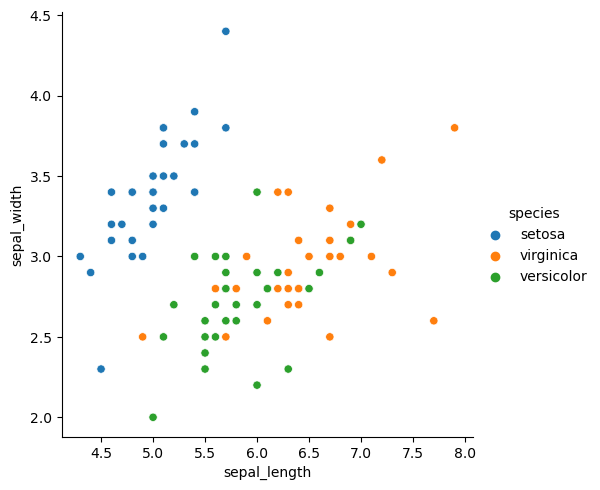

In [32]:
sns.relplot(data=train_iris,x='sepal_length',y='sepal_width',hue='species') # scatterplot(default)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


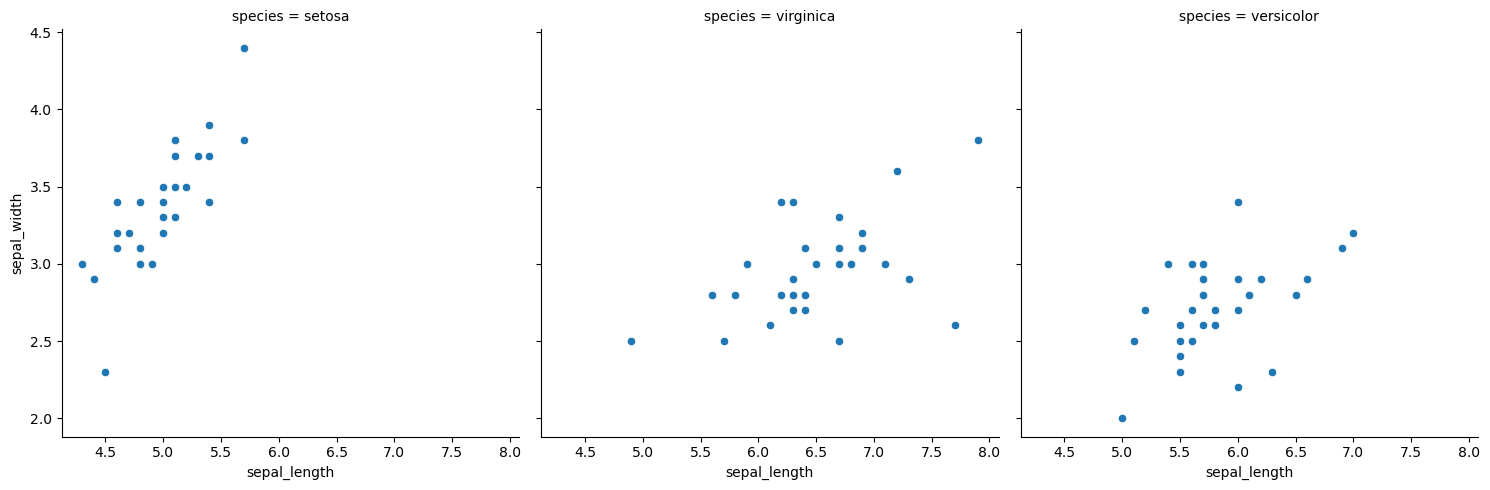

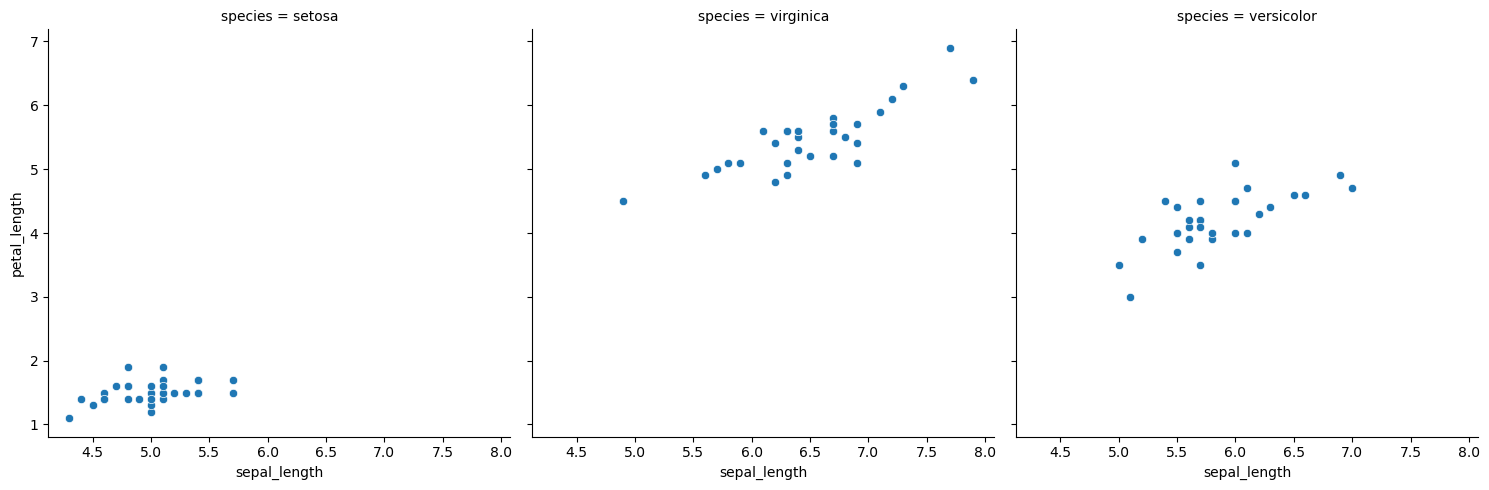

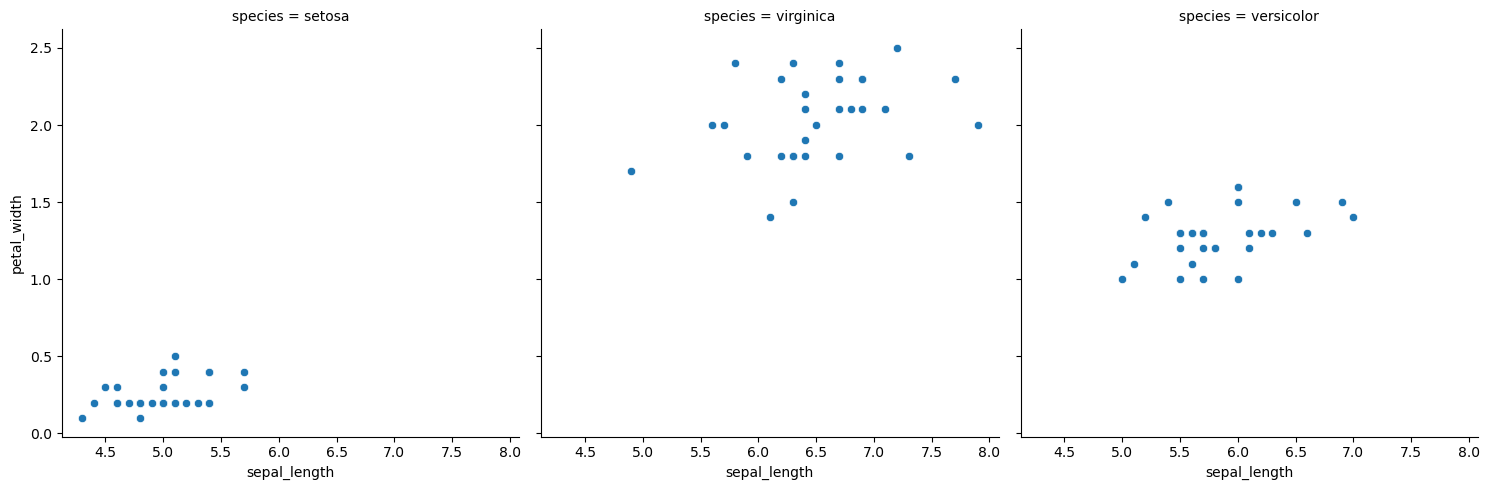

In [33]:
# we can use 'col' instead of 'hue'

# List of measurement types
measurements = ['sepal_width', 'petal_length', 'petal_width']
for i in measurements:
    sns.relplot(data=train_iris,x='sepal_length', y=i, col='species')
plt.show()
    
    



### as instrctor said, it is not required to do.

> 4.3 Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

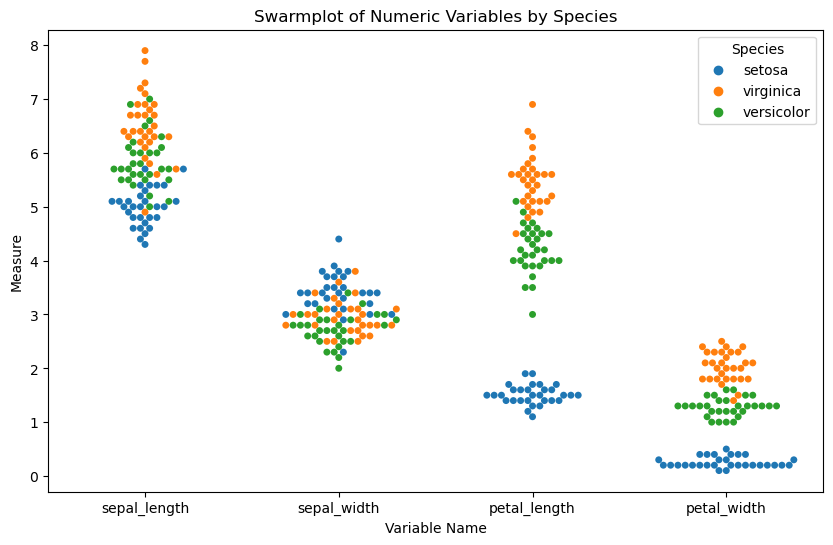

In [34]:


# Melt the DataFrame to long format
melted_df = pd.melt(train_iris, id_vars='species', var_name='variable', value_name='measure')

# Create a swarmplot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='variable', y='measure', hue='species', data=melted_df)
plt.xlabel('Variable Name')
plt.ylabel('Measure')
plt.title('Swarmplot of Numeric Variables by Species')
plt.legend(title='Species');
# plt.show()


> 4.4 Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared   to setosa?

> Answer the question through both a plot and using a mann-whitney or t-test.

> If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Hypothesis Setting:

$H_o$ : There is no significant different of sepal area in between 'virginica' and 'setosa'.

$H_a$ : There is significant different of sepal area in between 'virginica' and 'setosa'.

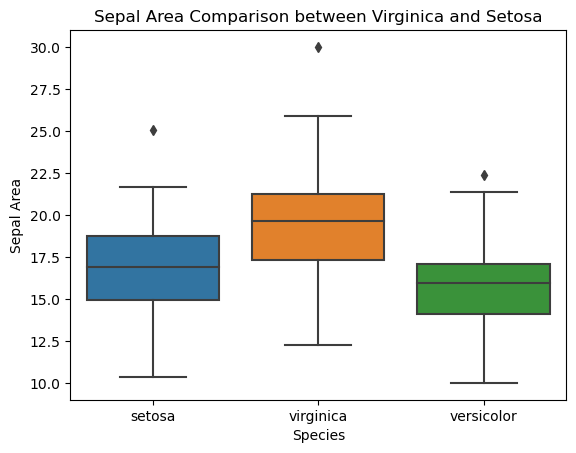

In [35]:

alpha=0.05

# Calculate sepal area for 'virginica' and 'setosa'
train_iris['sepal_area'] = train_iris['sepal_length'] * train_iris['sepal_width']

# Separate data for 'virginica' and 'setosa'
virginica_sepal_area = train_iris[train_iris['species'] == 'virginica']['sepal_area']
setosa_sepal_area = train_iris[train_iris['species'] == 'setosa']['sepal_area']

# Plotting boxplot for visual comparison
sns.boxplot(x='species', y='sepal_area', data=train_iris)
plt.title('Sepal Area Comparison between Virginica and Setosa')
plt.xlabel('Species')
plt.ylabel('Sepal Area')
plt.show()




In [36]:
#For normality check(virginica_sepal_area):
sha_stat, p_val = stats.shapiro(train_iris.sepal_area )
sha_stat, p_val    


(0.9692532420158386, 0.031337808817625046)

In [37]:
# For equal variances check:
lev_stat, p_val = stats.levene(virginica_sepal_area,setosa_sepal_area)
lev_stat, p_val

(0.36498481213841283, 0.5481066799623959)

In [38]:
# As we know that both group of data 'virginica_sepal_area' vs 'setosa_sepal_area' are independent.

# Performing t-test
t_stat, p_value = stats.ttest_ind(virginica_sepal_area, setosa_sepal_area)
p_value

0.006887872097767309


Since p_value < alpha, so we can reject Ho.
This conclude that there is relation in sepal area between virginica and setosa.


> 4.5 Document takeaways and any actions.

- When we compare sepal area of virginica and setosa, we conclude that there is significantly difference between
them.

- from the boxplot, virginica's sepal area is greater than setosa's sepal area.

- measurements does not follows normal dist but it area does.

## Part II

1. Explore your titanic dataset more completely.

    - Determine drivers of the target variable
    
    - Determine if certain columns should be dropped
    
    - Determine if it would be valuable to bin some numeric columns
    
    - Determine if it would be valuable to combine multiple columns into one.
    


2. Does it make sense to combine any features?

3. Do you find any surprises?

4. Document any and all findings and takeaways in your notebook using markdown.



In [39]:
df=acquire.get_titanic_data()
df.head(3)

this file exists, reading csv


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [40]:
df=prepare.prep_titanic(df)
df.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1


## Part III ( telco data )

    -Explore your telco data to discover drivers of churn
    -Determine if certain columns should be dropped
    -Determine if it would be valuable to bin some numeric columns
    -Determine if it would be valuable to combine multiple columns into one.

### What are your drivers of churn?

### Does it make sense to combine any features?

### Do you find any surprises?

### Document any and all findings and takeaways in your notebook using markdown.

In [41]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import our acquire module
import acquire
import prepare

from sklearn.model_selection import train_test_split
from scipy import stats

In [42]:
df=acquire.get_telco_data()

this file exists, reading csv


In [43]:
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [44]:
df=prepare.prep_telco(df)

In [45]:
df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [46]:
df.nunique()

customer_id              7043
gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     73
phone_service               2
multiple_lines              3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
paperless_billing           2
monthly_charges          1585
total_charges            6531
churn                       2
contract_type               3
internet_service_type       2
payment_type                4
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

from above info, 
internet_service_type has plenty of null values.so lets process it.

In [48]:
df.internet_service_type.isnull().sum()

1526

In [49]:
df.internet_service_type.value_counts(dropna=False)

internet_service_type
Fiber optic    3096
DSL            2421
NaN            1526
Name: count, dtype: int64

In [50]:
df['internet_service_type']=df['internet_service_type'].fillna('NaN') 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [52]:
df.internet_service_type.value_counts()

internet_service_type
Fiber optic    3096
DSL            2421
NaN            1526
Name: count, dtype: int64

note: Before filling 'NaN', it was empty. Eventhough it was empty, when we apply value_counts() function and dropna=False. It shows 'NaN' category , actually it was empty there. But after we fill with 'NaN', we dont have to mention argument dropna=False. it will show NaN category also.

### Determine if it would be valuable to bin some numeric columns

In [53]:
df.tenure.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [54]:
df.tenure.nunique()

73

In [55]:
# Bin the tenure and monthly_charges columns
bin_edges = [0, 12, 24, 36, 48, 60, 72]
bin_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'] 

df['tenure_bin'] = pd.cut(df['tenure'], bins=bin_edges, labels=bin_labels)

In [56]:
df.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_bin
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,0-12
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0-12
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0-12


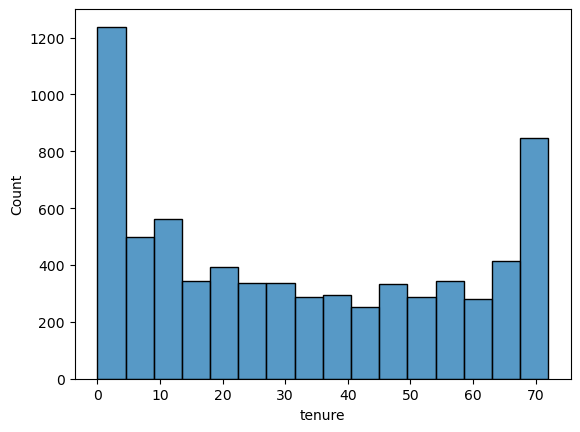

In [57]:
sns.histplot(data=df,x='tenure');

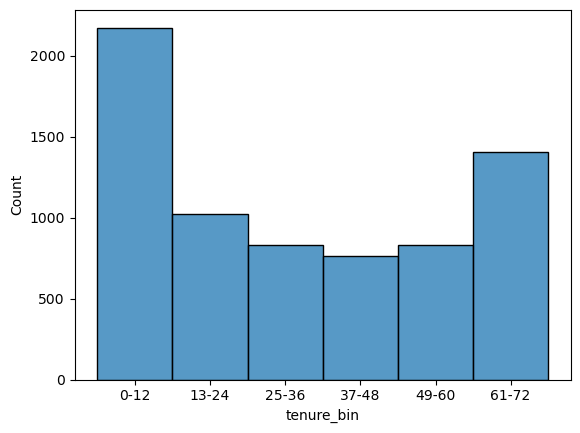

In [58]:
sns.histplot(data=df,x='tenure_bin');

### Determine if it would be valuable to combine multiple columns into one.

In [59]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_bin
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,0-12
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0-12


'''
seudo code for below only for understanding purpose

df=np.where(....   ,np.where(.....  ,np.where(.....,'No Streaming')))

'''

In [60]:
df['streaming_services'] = np.where(
    (df['streaming_tv'] == 'Yes') & (df['streaming_movies'] == 'Yes'), 'TV and Movies',
    np.where(
        (df['streaming_tv'] == 'Yes') & (df['streaming_movies'] == 'No'), 'TV',
        np.where(
            (df['streaming_tv'] == 'No') & (df['streaming_movies'] == 'Yes'), 'Movies',
            'No Streaming'
        )
    )
)

df = df.drop(['streaming_tv', 'streaming_movies'], axis=1)

In [89]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_bin,streaming_services
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,65.6,593.30,No,One year,DSL,Mailed check,0-12,TV
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0-12,Movies
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0-12,No Streaming
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,13-24,TV and Movies
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,0-12,TV


In [90]:
contingency_table=pd.crosstab(df['streaming_services'],df['churn'])
contingency_table

churn,No,Yes
streaming_services,,
Movies,545,247
No Streaming,2736,808
TV,524,243
TV and Movies,1369,571


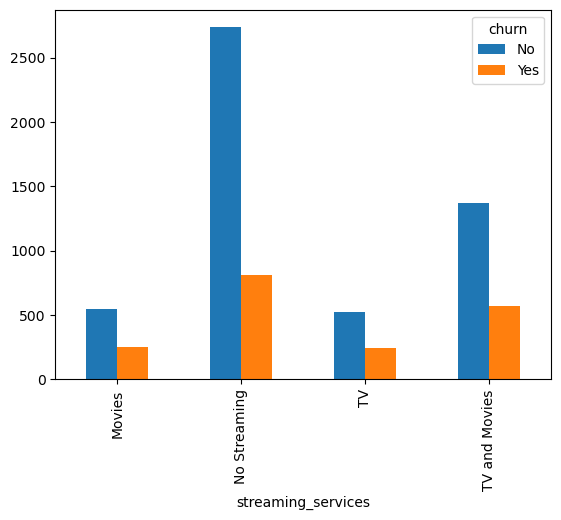

In [93]:
contingency_table.plot.bar()



## Splitting data

In [61]:
train_telco,validate_telco,test_telco=prepare.splitting_data(df,'churn')

In [62]:
print(f'shape of telco DB: {df.shape}')
print('-----------------------------')
print(f'shape of train_telco: {train_telco.shape}')
print(f'shape of validate_telco: {validate_telco.shape}')
print(f'shape of test_telco: {test_telco.shape}')

shape of telco DB: (7043, 21)
-----------------------------
shape of train_telco: (4225, 21)
shape of validate_telco: (1409, 21)
shape of test_telco: (1409, 21)


## Bivariate stats

> -Explore your telco data to discover drivers of churn

In [63]:
train_telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_bin,streaming_services
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),37-48,Movies
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,0-12,No Streaming
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No,19.95,214.75,Yes,Month-to-month,NaN,Mailed check,0-12,No Streaming


In [64]:
train_telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   customer_id            4225 non-null   object  
 1   gender                 4225 non-null   object  
 2   senior_citizen         4225 non-null   int64   
 3   partner                4225 non-null   object  
 4   dependents             4225 non-null   object  
 5   tenure                 4225 non-null   int64   
 6   phone_service          4225 non-null   object  
 7   multiple_lines         4225 non-null   object  
 8   online_security        4225 non-null   object  
 9   online_backup          4225 non-null   object  
 10  device_protection      4225 non-null   object  
 11  tech_support           4225 non-null   object  
 12  paperless_billing      4225 non-null   object  
 13  monthly_charges        4225 non-null   float64 
 14  total_charges          4225 non-null   flo

In [65]:
# Analyze churn distribution
train_telco['churn'].value_counts()



churn
No     3104
Yes    1121
Name: count, dtype: int64

In [66]:
train_telco['tenure'].value_counts()

tenure
1     353
72    233
2     142
3     124
4     108
     ... 
36     29
33     29
44     29
39     28
0       8
Name: count, Length: 73, dtype: int64

### 1.Hypothesis Setting: 

('churn'------>'tenure'(chi-2), 'monthly_charges'(t-test,2 sample), 'total_charges'(t-test,2 sample)

$H_o$: There is no relationship between 'churn' and 'tenure'
        
$H_a$: There is relationship between 'churn' and 'tenure'


### 2.Visualization:

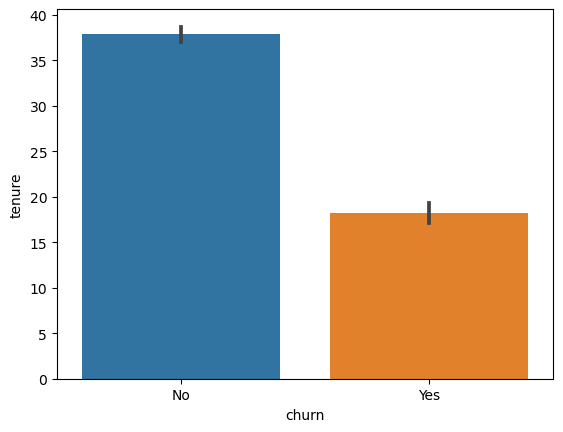

In [67]:

sns.barplot(data=train_telco, y='tenure', x='churn');


### 3. Analyze (with stats)

In [68]:
observed = pd.crosstab(train_telco.churn, train_telco.tenure)
observed

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
churn,,,,,,,,,,,,,,,,,,,,,
No,8,128,61,67,57,40,43,50,49,43,...,45,38,43,52,55,51,60,65,94,228
Yes,0,225,81,57,51,37,20,29,26,28,...,3,2,5,8,5,6,4,5,4,5


In [69]:
#chi2 returns 4 variables
chi2, p, dof, expected = stats.chi2_contingency(observed)


In [70]:
p

1.8288505134460156e-103

p-value is less than alpha, therefore, we reject the null hypothesis.

we can conclude that there is a relationship between churn and tenure.



### 4. Summarize
We confirmed there is a relationship between churn and tenure, 

### 1. Hypothesis setting for 'churn' and 'monthly_charges'

Ho: There is NO relationship between churn and monthly_charges
    (no relationship between churned and not churned monthly_charges)

Ha: There is relationship between churn and monthly_charges
    ( relationship between churned and not churned monthly_charges)




### 2. Visualization: 

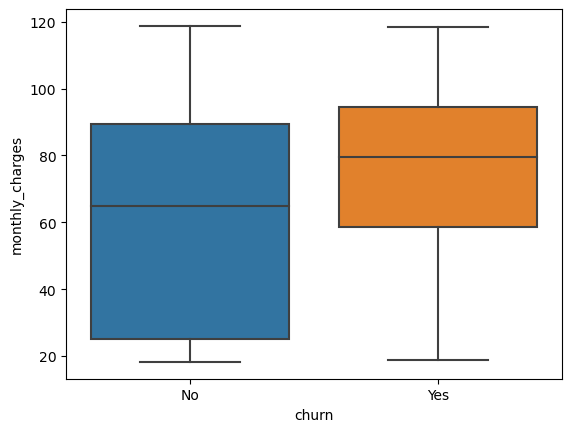

In [71]:
sns.boxplot(data=train_telco, x='churn', y='monthly_charges')
plt.show()


> it does look like who paid more monthly charges, were more likely to churn.

### 3.Analyze ( with stats)

what type of test should i use for this?

comparing means
if we assume normality, do a ttest
since we are comparing two subgroups (churned vs non-churned), 2-sample ttest
since we are checking for any difference, 2-tail

In [72]:
#make two arrays of peoples for churned and not churned

#all the fares for people that survived
churned = train_telco[train_telco.churn == 'Yes'].monthly_charges

#all the fares for people that didnt survive
not_churned = train_telco[train_telco.churn == 'No'].monthly_charges

In [73]:
churned.shape

(1121,)

In [74]:
not_churned.shape

(3104,)

In [75]:
# for normality check
sha_stat, p_val = stats.shapiro(train_telco.monthly_charges)
sha_stat, p_val

(0.9185670018196106, 5.647232811229013e-43)

since p_val<alpha, so we reject Ho.
This conclude that monthly_charges does not follow the normal distribution.

In [76]:
# for equal variances:

# levene test: test for equality of variance:
# H0: There is equal variance in our two samples
# Ha: There is an inequality of variance in our two samples


In [77]:
lev_stat, p_val = stats.levene(churned,not_churned)


In [78]:
p_val

2.6904150502588167e-50

since p_val < alpha, so we reject Ho.
This concludes that there is an inequality of variances.

In [79]:
# since 'monthly_charges' does not follow the normal distribution, so 
# for the comparision of two sample means (churned vs not_churned), we use mann-whitney test

# Performing a mann-whitney
stat, p_value = stats.mannwhitneyu(churned,not_churned)



In [80]:
p_value

9.83259830397179e-30

### 4. summarize
since p_value < alpha, so we reject Ho.
This conclude that there is relationship between 'churn' and 'monthly_charges'.

### 1.Hypothesis Setting for 'churn' vs 'total_charges'

Ho: There is NO relationship between churn and total_charges (no relationship between churned and not churned total_charges).

Ha: There is relationship between churn and total_charges ( relationship between churned and not churned total_charges).


### 2. Visualize

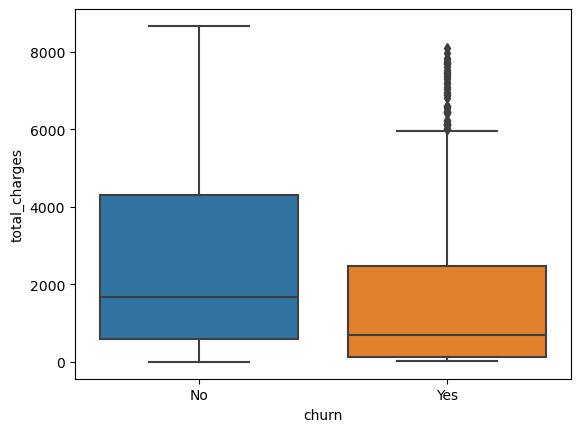

In [81]:
sns.boxplot(data=train_telco, x='churn', y='total_charges')
plt.show()

### Analyze( with stats )

In [82]:
#make two arrays of peoples for churned and not churned

#all the fares for people that survived
churned = train_telco[train_telco.churn == 'Yes'].total_charges

#all the fares for people that didnt survive
not_churned = train_telco[train_telco.churn == 'No'].total_charges

In [83]:
# for normality check

sha_stat, p_val = stats.shapiro(train_telco.total_charges)
sha_stat, p_val


(0.8605527281761169, 0.0)

Since p_val < alpha, so we reject Ho.
so, total_charges does not follow normal distribution, because of this reason, we can't implement t-test(2 sample and 2 tails). For the comparison of the means of two subgroups( churned vs not_churned), we apply mann-whitney test.

In [84]:
# Performing a mann-whitney
stat, p_value = stats.mannwhitneyu(churned,not_churned)



In [85]:
p_value

1.1629326587516354e-51

### 4. summarize
Since p_value < alpha, so we reject Ho.
This concludes there is relationship between churn and total_charges.

In [86]:
train_telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_bin,streaming_services
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),37-48,Movies
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,0-12,No Streaming
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No,19.95,214.75,Yes,Month-to-month,NaN,Mailed check,0-12,No Streaming


### Does it make sense to combine any features?

In [87]:
train_telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_bin,streaming_services
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),37-48,Movies
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,0-12,No Streaming
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No,19.95,214.75,Yes,Month-to-month,NaN,Mailed check,0-12,No Streaming


### visualize

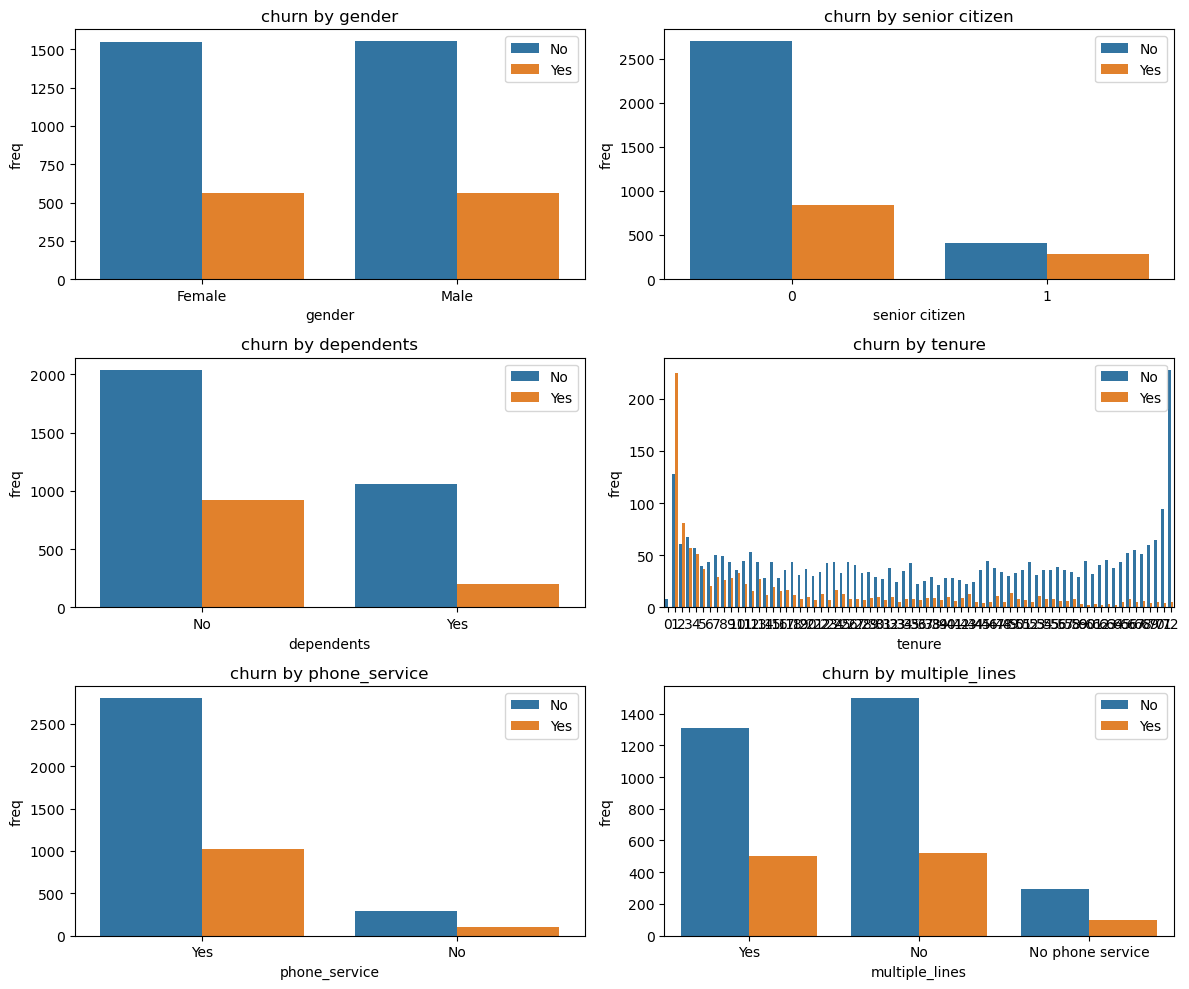

In [88]:
# Set up the plot for sepal length

plt.figure(figsize=(12, 10))


plt.subplot(3,2,1)
sns.countplot( x='gender',hue= 'churn', data=train_telco)
plt.title('churn by gender')
plt.xlabel('gender')
plt.ylabel('freq')
plt.legend()


plt.subplot(3,2,2)
sns.countplot( x='senior_citizen',hue= 'churn', data=train_telco)
plt.title('churn by senior citizen')
plt.xlabel('senior citizen')
plt.ylabel('freq')
plt.legend()

plt.subplot(3,2,3)
sns.countplot( x='dependents',hue= 'churn', data=train_telco)
plt.title('churn by dependents')
plt.xlabel('dependents')
plt.ylabel('freq')
plt.legend()


plt.subplot(3,2,4)
sns.countplot( x='tenure',hue= 'churn', data=train_telco)
plt.title('churn by tenure')
plt.xlabel('tenure')
plt.ylabel('freq')
plt.legend()


plt.subplot(3,2,5)
sns.countplot( x='phone_service',hue= 'churn', data=train_telco)
plt.title('churn by phone_service')
plt.xlabel('phone_service')
plt.ylabel('freq')
plt.legend()

plt.subplot(3, 2, 6)
sns.countplot( x='multiple_lines',hue= 'churn', data=train_telco)
plt.title('churn by multiple_lines')
plt.xlabel('multiple_lines')
plt.ylabel('freq')
plt.legend()

# Adjust layout
plt.tight_layout()

# show the plot
plt.show()


### Document any and all findings and takeaways in your notebook using markdown.





- As increases the 'monthly_charges' and 'total_charges', the churned rate of the customer will be high.

- which has continuous values, it is not normal distribution.

- total_charges have outliers but not in monthly_charges with churn.